In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "fitbit"

# CASE STUDY 1
# *:How Can a Wellness Technology Company Play It Smart?  *

## About the company : Bellabeat    
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products for women. 
By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website.

## Business Task 
We will analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices. Then, we will apply these insights on products of Bellabeat and suggest efficient marketing strategies to our stakeholders.

1.	What are some trends in smart device usage?    
2.	How could these trends apply to Bellabeat customers?    
3.	How could these trends help influence Bellabeat marketing strategy?     



In [2]:
#Install and load packages
install.packages("tidyverse") 
install.packages("rmarkdown") 
install.packages("shiny") 
install.packages("skimr") 
install.packages("janitor") 
install.packages("lubridate") 
install.packages("dplyr") 

library(tidyverse)
library(rmarkdown)
library(shiny)
library(skimr)
library(janitor)
library(lubridate)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("dplyr"):
“installation of package ‘dplyr’ had non-zero exit status”

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




## Prepare
Sršen pointed a specific data set:   
●[ FitBit Fitness Tracker Data ](http://../input/fitbit)(CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits. 


In [3]:
#Importing and loading data
dailyActivity_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
sleepDay_merged <- read.csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")


In [4]:
#Take a look at first 5 rows for each dataset
#Noticed some columns have '0' value.
head(dailyActivity_merged)
head(sleepDay_merged)


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
2,1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
3,1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
4,1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
5,1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
6,1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
,<dbl>,<chr>,<int>,<int>,<int>
1,1503960366,4/12/2016 12:00:00 AM,1,327,346
2,1503960366,4/13/2016 12:00:00 AM,2,384,407
3,1503960366,4/15/2016 12:00:00 AM,1,412,442
4,1503960366,4/16/2016 12:00:00 AM,2,340,367
5,1503960366,4/17/2016 12:00:00 AM,1,700,712
6,1503960366,4/19/2016 12:00:00 AM,1,304,320


In [5]:
# Make sure there's no NA value
drop_na(dailyActivity_merged)
drop_na(sleepDay_merged)


Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728
1503960366,4/18/2016,13019,8.59,8.59,0,3.25,0.64,4.71,0,42,16,233,1149,1921
1503960366,4/19/2016,15506,9.88,9.88,0,3.53,1.32,5.03,0,50,31,264,775,2035
1503960366,4/20/2016,10544,6.68,6.68,0,1.96,0.48,4.24,0,28,12,205,818,1786


Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/23/2016 12:00:00 AM,1,361,384


I found 'TotalDistance' and 'TrackerDistance' are duplicated data , and 'SedentaryActiveDistance' should be zero all the time.So I will delete the 'TrackerDistance'and 'SedentaryActiveDistance' along with 'LoggedActivitiesDistance'column which has no data from the dailyActivity_merged file.I also unify the activity date and sleep date as 'Date'.

In [6]:
# Cleaning data
colnames(dailyActivity_merged)[2] <- "Date"
colnames(sleepDay_merged)[2] <- "Date"

dailyactivity <- dailyActivity_merged[-c(5,6,10)]
print('columns in dailyActivity_merged')
colnames(dailyActivity_merged)
print('columns in sleepDay_merged')
colnames(sleepDay_merged)



[1] "columns in dailyActivity_merged"


[1] "Id"                       "Date"                    
 [3] "TotalSteps"               "TotalDistance"           
 [5] "TrackerDistance"          "LoggedActivitiesDistance"
 [7] "VeryActiveDistance"       "ModeratelyActiveDistance"
 [9] "LightActiveDistance"      "SedentaryActiveDistance" 
[11] "VeryActiveMinutes"        "FairlyActiveMinutes"     
[13] "LightlyActiveMinutes"     "SedentaryMinutes"        
[15] "Calories"

[1] "columns in sleepDay_merged"


[1] "Id"                 "Date"               "TotalSleepRecords" 
[4] "TotalMinutesAsleep" "TotalTimeInBed"

In [7]:
#check if I have same count of distinct Ids in both datasets
n_distinct(dailyactivity$Id)
n_distinct(sleepDay_merged$Id)

[1] 33

[1] 24

It means participants used the devices more on daily activity than sleep minutes. 
I'd like to combine two data to analyze the relationship of variables.

In [8]:
#Merging Data
df<- left_join(x = dailyactivity,
                   y = sleepDay_merged,
                  by = "Id","Date",
                  all.x = TRUE)

distinct(df,"Id","Date.x","TotalDistance","VeryActiveDistance",
         ",ModeratelyActiveDistance","LightActiveDistance",
         "VeryActiveMinutes","FairlyActiveMinutes","LightlyActiveMinutes","SedentaryMinutes",
         "Calories",
 .keep_all = TRUE)
print('Merged data')
df

Id,Date.x,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,⋯,"""Date.x""","""TotalDistance""","""VeryActiveDistance""",""",ModeratelyActiveDistance""","""LightActiveDistance""","""VeryActiveMinutes""","""FairlyActiveMinutes""","""LightlyActiveMinutes""","""SedentaryMinutes""","""Calories"""
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,⋯,Date.x,TotalDistance,VeryActiveDistance,",ModeratelyActiveDistance",LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories


[1] "Merged data"


Id,Date.x,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date.y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/19/2016 12:00:00 AM,1,304,320
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/20/2016 12:00:00 AM,1,360,377
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/21/2016 12:00:00 AM,1,325,364
1503960366,4/12/2016,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985,4/23/2016 12:00:00 AM,1,361,384


In [9]:
#let's check the number of distinct of Ids on merged data
n_distinct(df$Id)

[1] 33

Since the 'sleepDay_merged' data has more missing data, those data will be shown as '0' on the merged data. 

In [10]:
print('Summary of Data')
summary(df)

[1] "Summary of Data"


       Id               Date.x            TotalSteps    TotalDistance   
 Min.   :1.504e+09   Length:12668       Min.   :    0   Min.   : 0.000  
 1st Qu.:3.977e+09   Class :character   1st Qu.: 4676   1st Qu.: 3.180  
 Median :4.703e+09   Mode  :character   Median : 8582   Median : 6.120  
 Mean   :5.029e+09                      Mean   : 8124   Mean   : 5.745  
 3rd Qu.:6.962e+09                      3rd Qu.:11207   3rd Qu.: 7.920  
 Max.   :8.878e+09                      Max.   :36019   Max.   :28.030  
                                                                        
 VeryActiveDistance ModeratelyActiveDistance LightActiveDistance
 Min.   : 0.000     Min.   :0.0000           Min.   : 0.000     
 1st Qu.: 0.000     1st Qu.:0.0000           1st Qu.: 2.370     
 Median : 0.530     Median :0.4000           Median : 3.540     
 Mean   : 1.406     Mean   :0.7273           Mean   : 3.547     
 3rd Qu.: 2.310     3rd Qu.:1.0000           3rd Qu.: 4.850     
 Max.   :21.920     Max.  

## Analyze


According to the survey conducted by [PEW RESEARCH CENTER](https://www.pewresearch.org/fact-tank/2020/01/09/about-one-in-five-americans-use-a-smart-watch-or-fitness-tracker/ft_2020-01-09_fitnesstrackers_01a/), there are differences by gender,education,and ethnicity in using of smart health devices.It says that women are more likely than men to use regularly their devices, and the goal of using the device is losing weight.
The foundation of weight loss continues to be based on the fact that burning more calories than you take in. Therefore, I'd like to find what factors from the data affect on burning calories and gain insight of marketing strategy of the company. 

[](https://www.pewresearch.org/fact-tank/2020/01/09/about-one-in-five-americans-use-a-smart-watch-or-fitness-tracker/ft_2020-01-09_fitnesstrackers_01a/"><img src="https://www.pewresearch.org/wp-content/uploads/2020/01/ft_2020.01.09_fitnesstrackers_01a.png?w=454"></a>)

In [11]:
library(tidyverse)
library(dplyr)
library(ISLR)
library(ggplot2)
library(ggrepel)
library(haven)

First of all, I examined the relationship between 'Calories' and 'Total Steps'. 
It is obvious to see the positive correlation between them. 

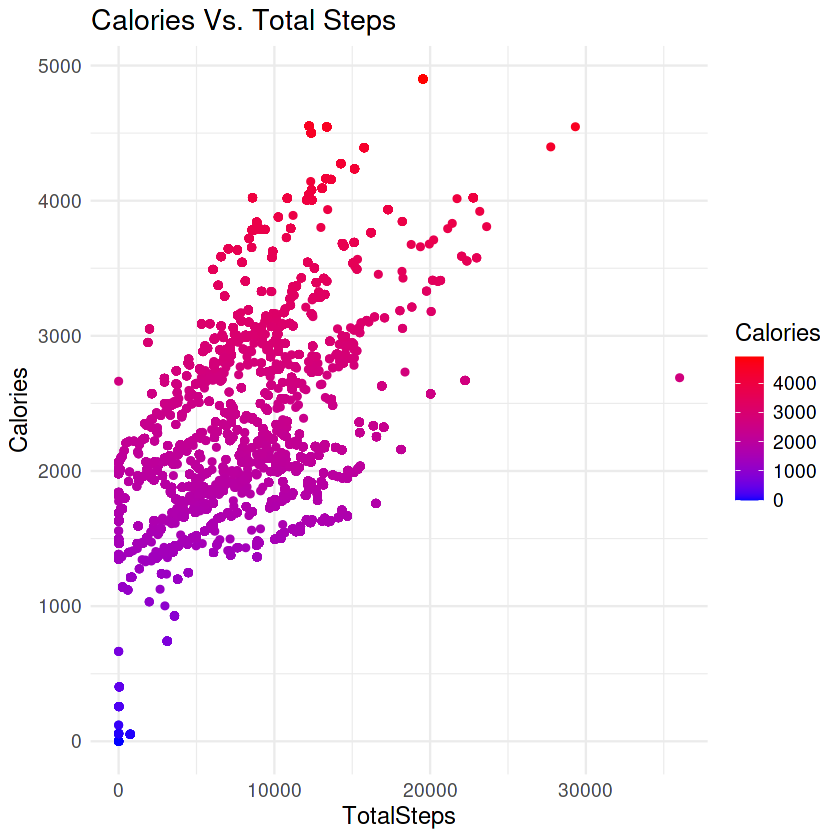

In [12]:
theme_set(theme_minimal())
ggplot(data = df) + 
    geom_point(mapping =  aes(x= TotalSteps, y = Calories ,color = Calories)) + 
    labs(title = "Calories Vs. Total Steps", face = "bold") +
 scale_color_gradient(low = "blue", high = "red") +
 theme(text= element_text(size = 14))
options(repr.plot.width = 10, repr.plot.height = 8)

Next,I'd like to examine the relationship among 'intensity of activity','sleep quality', and 'calories'. 
The intensity of activity is classified according to the [Total Steps Guidelines](https://www.10000steps.org.au/articles/counting-steps/)
* Sedentary is less than 5,000 steps per day 
* Low active is 5,000 to 7,499 steps per day
* Somewhat active is 7,500 to 9,999 steps per day
* Active is more than 10,000 steps per day
* Very active is more than 12,500 

The sleep quality is classified by 'Total Sleep hours'.( reference :[National Sleep Foundation](https://www.sleepfoundation.org/how-sleep-works/how-much-sleep-do-we-really-need))


The recommended sleep times are different to each age group, 
but people in Adult group ( 26-64 years old) need 7-9 hours of sleep. 
Therefore, the data can be broken into 3 different groups.

* Over sleep : >9 hours(>=540 mins)  
* Good Sleep :7~9 hours(>=420 mins)  
* Less Sleep : <7 hours(>= 0 mins)  

In [13]:
# using case_when() to group the intensity of activity and the sleep quality.
df1<- df %>%  
  mutate(intensity = case_when(
    .$TotalSteps < 5000 ~ "Sedentary",
    .$TotalSteps >= 5000 & .$TotalSteps < 7500 ~ "Low Active",
    .$TotalSteps >= 7500 & .$TotalSteps < 10000 ~ "Somewhat Active",
    .$TotalSteps >= 10000 & .$TotalSteps < 12500 ~ "Active",
    .$TotalSteps >= 12500 ~ "Very Active"
  ),SleepQuality = case_when(
    .$TotalMinutesAsleep/60 >= 7 & .$TotalMinutesAsleep/60 <= 9 ~ "Good Sleep",
    .$TotalMinutesAsleep/60 < 7 ~ "Less Sleep",
    .$TotalMinutesAsleep/60 > 9 ~ "Over Sleep"
   ))


In [14]:
#Let's check if those columns added
head(df1)

,Id,Date.x,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Date.y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,intensity,SleepQuality
,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,728,1985,4/12/2016 12:00:00 AM,1,327,346,Very Active,Less Sleep
2,1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,728,1985,4/13/2016 12:00:00 AM,2,384,407,Very Active,Less Sleep
3,1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,728,1985,4/15/2016 12:00:00 AM,1,412,442,Very Active,Less Sleep
4,1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,728,1985,4/16/2016 12:00:00 AM,2,340,367,Very Active,Less Sleep
5,1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,728,1985,4/17/2016 12:00:00 AM,1,700,712,Very Active,Over Sleep
6,1503960366,4/12/2016,13162,8.5,1.88,0.55,6.06,25,13,328,728,1985,4/19/2016 12:00:00 AM,1,304,320,Very Active,Less Sleep


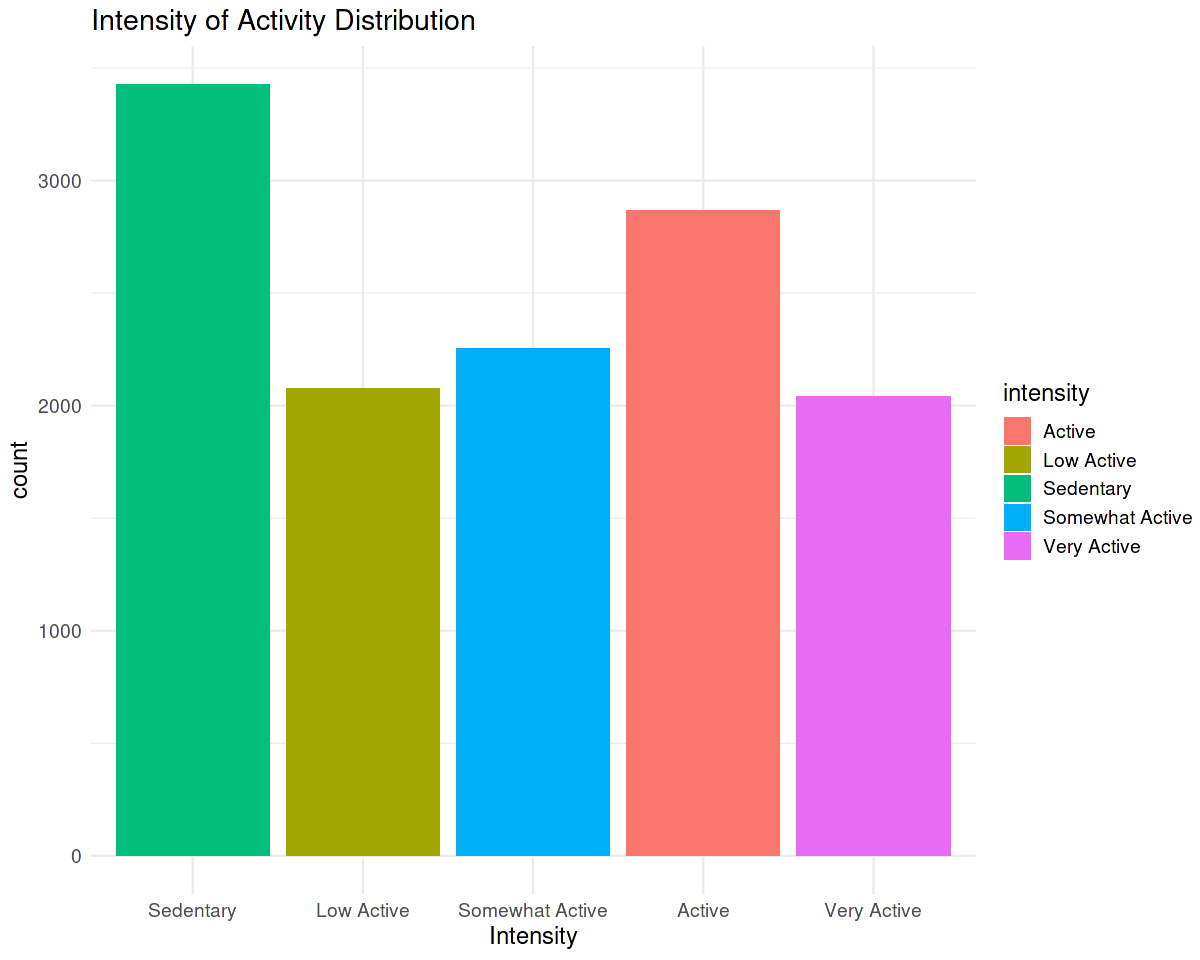

In [15]:
# let's chck the distribution of intensity of activity.
Intensity <- factor(df1$intensity, levels = c("Sedentary","Low Active","Somewhat Active","Active","Very Active"))
options(repr.plot.width = 10, repr.plot.height = 8)
ggplot(data = df1) + 
    geom_bar(mapping = aes(x = Intensity, fill = intensity)) +
    labs(title = "Intensity of Activity Distribution", face = "bold") +
    theme(text= element_text(size = 14))


The bar graph shows that 'Sedentary' which is less than 5000 steps a day has the most count. It means majority of participants walk less than they need. 


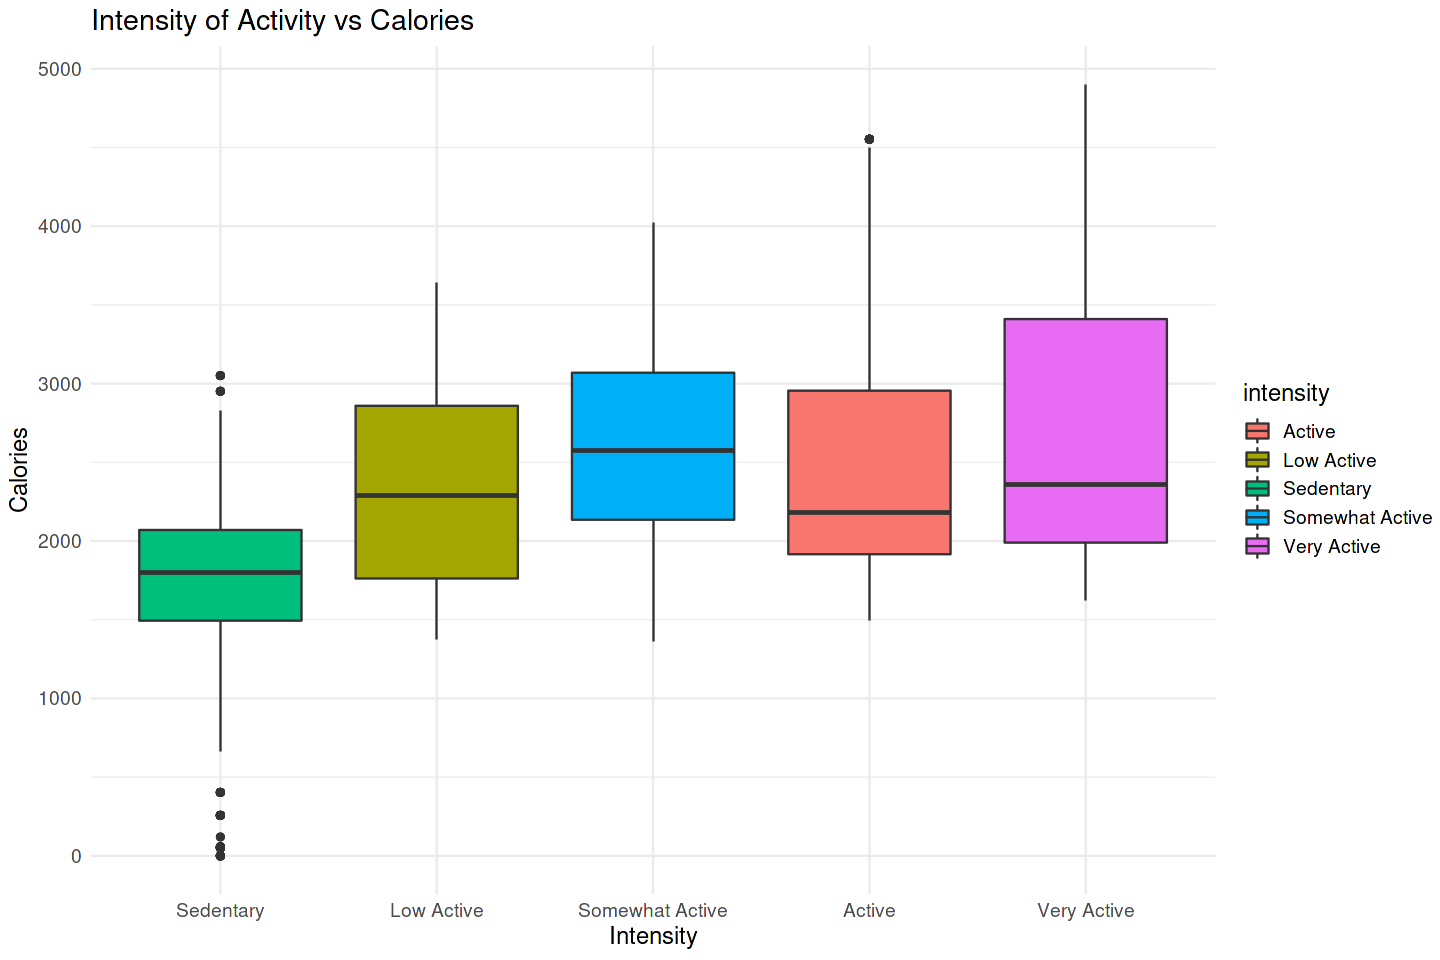

In [16]:
#verify the relationship between the intensity of activity and calories
Intensity <- factor(df1$intensity, levels = c("Sedentary","Low Active","Somewhat Active","Active","Very Active"))
options(repr.plot.width = 12, repr.plot.height = 8)
p <- ggplot(df1,aes(x = Intensity,y = Calories,fill= intensity)) +
    geom_boxplot() +
    labs(title = "Intensity of Activity vs Calories", face = "bold") +
     theme(text= element_text(size = 14))
p 

'Very Active' burns most calories but in the aspect of mean value of the intensity, the average value of'Somewhat Active' burns more calories than the one in 'Very Active'. 

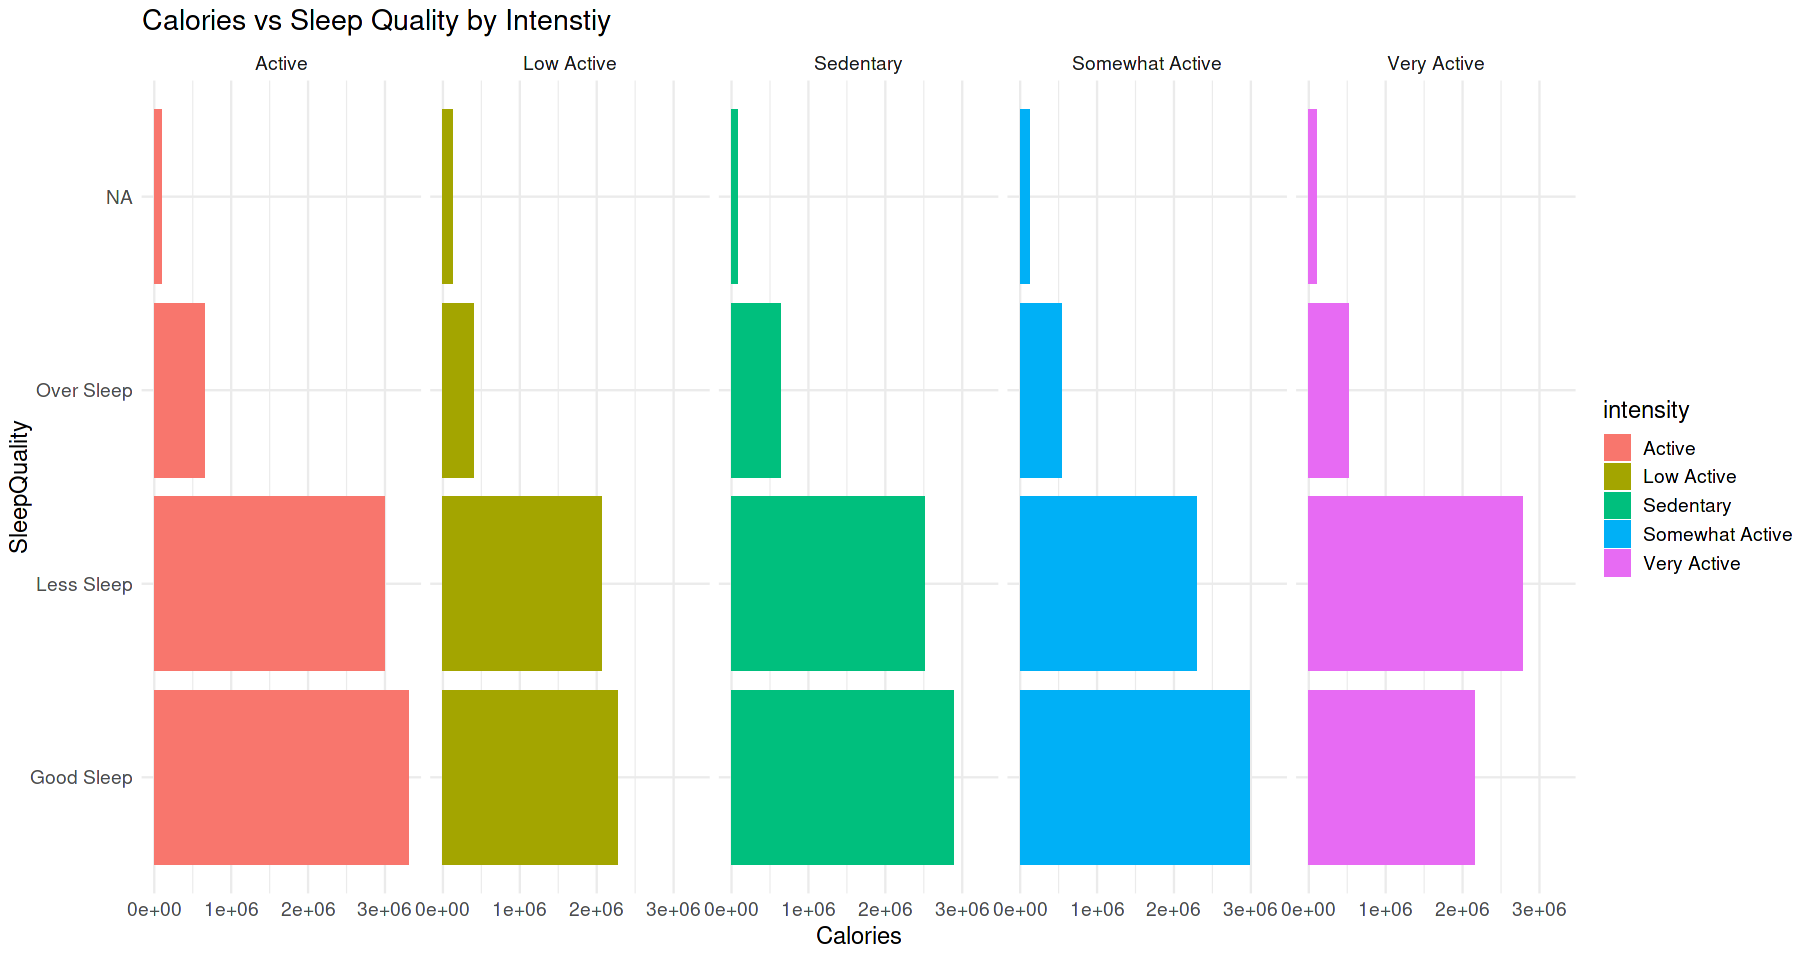

In [17]:
# It's time to see if there's any correlation among sleep quality, intensity of activity, and calories.
SleepQuality<- factor(df1$SleepQuality, level = c("Less Sleep","Good Sleep","Over Sleep"))
options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(data = df1) + 
    geom_col(mapping = aes(x = SleepQuality, y = Calories,fill = intensity)) + 
    facet_grid(~intensity) + 
    labs(title = "Calories vs Sleep Quality by Intenstiy", face = "bold") +
    theme(text= element_text(size = 14)) +
    coord_flip()


The 'Less Sleep' group and the 'Good Sleep' group burn much more calories than the 'Over Sleep' group. 
The good sleep burns most calories except the 'very active' intenstiy, which the 'Less Sleep' group burns little bit more than the 'Good Sleep' group. 
In general, getting a good sleep help burn calories.


## Conclusion
 The fitness tracker is one of the tools that help people be in ,so-called, 'well-being'. The demand of these devices is increasing every year, and people get more and more interest on their physical health. Throughout the analysis, it is found out that participants use their devices mostly on tracking their activity such as number of steps,walking distance,the intensity of movement and total hours of sleep. That is, people check the amount of their activities and motivate themselves to move more and rest better. 
 As women are the primary customers of products and services in Bellabeat, we try relating to women more by explaining what our products do for them and how our services reach their goal and let them engage with us. Furthermore, we offer customized products and services by narrowing down age range. Different age groups have different needs and the right amount of activities and sleep. Therefore, the company should provide unique and women-centered service to differenciate with other competitors.